In [116]:
############## Machine Learning: Linear Regression: HOUSE DATASET #############
################## Step 1: Import all the required Libraries ##################
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sb

In [117]:
################## Machine Learning: Linear Regression #####################
################ Step 2: Reading (or Loading) the dataset: #################

data = pd.read_csv('house.csv')
data

Area  Room  Parking  Warehouse  Elevator             Address  \
0      63     1     True       True      True             Shahran   
1      60     1     True       True      True             Shahran   
2      79     2     True       True      True              Pardis   
3      95     2     True       True      True       Shahrake Qods   
4     123     2     True       True      True      Shahrake Gharb   
...   ...   ...      ...        ...       ...                 ...   
3474   86     2     True       True      True  Southern Janatabad   
3475   83     2     True       True      True            Niavaran   
3476   75     2    False      False     False              Parand   
3477  105     2     True       True      True              Dorous   
3478   82     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000e+08    18333.33  
3     9.025000e+08    30083.33  
4     7.000000e+09   233333.33  
...            ...         ...  
3474  3.500000e+09   116666.67  
3475  6.800000e+09   226666.67  
3476  3.650000e+08    12166.67  
3477  5.600000e+09   186666.67  
3478  3.600000e+08    12000.00  

[3479 rows x 8 columns]

In [118]:

############# Machine Learning: Linear Regression #############
################# Step 3: Inspect Data Types: #################
# Inspect data types: To view the data types of each column in the DataFrame, (1) use the .info() method or (2) the .dtypes attribute.

# Load the CSV file into a pandas DataFrame
try:
    data = pd.read_csv('house.csv')

    # Get the shape of the DataFrame
    # The .shape attribute returns a tuple (number_of_rows, number_of_columns)
    data_shape = data.shape

    # Print the shape
    print(f"The shape of car.csv is: {data_shape}")
    print(f"Number of rows: {data_shape[0]}")
    print(f"Number of columns: {data_shape[1]}")
    
    # Using .dtypes for a Series showing only data types
    print(f"\nType of data is: {data.dtypes}")
    
except FileNotFoundError:
    print("Error: 'car.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")

The shape of car.csv is: (3479, 8)
Number of rows: 3479
Number of columns: 8

Type of data is: Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object


In [119]:
############# Machine Learning: Linear Regression #############
################# Step 3: Inspect Data Types: #################
# Inspect data types: To view the data types of each column in the DataFrame, (1) use the .info() method or (2) the .dtypes attribute.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [120]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

data.isna().sum() # Count missing values per column


Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [121]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################
# Converting Booleans of True and False into "0" and "1"

# Replace True with 1 and False with 0
data.replace({True: 1, False: 0}, inplace=True)
data

C:\Users\komey\AppData\Local\Temp\ipykernel_25668\943935377.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({True: 1, False: 0}, inplace=True)


Area  Room  Parking  Warehouse  Elevator             Address  \
0      63     1        1          1         1             Shahran   
1      60     1        1          1         1             Shahran   
2      79     2        1          1         1              Pardis   
3      95     2        1          1         1       Shahrake Qods   
4     123     2        1          1         1      Shahrake Gharb   
...   ...   ...      ...        ...       ...                 ...   
3474   86     2        1          1         1  Southern Janatabad   
3475   83     2        1          1         1            Niavaran   
3476   75     2        0          0         0              Parand   
3477  105     2        1          1         1              Dorous   
3478   82     2        0          1         1              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000e+08    18333.33  
3     9.025000e+08    30083.33  
4     7.000000e+09   233333.33  
...            ...         ...  
3474  3.500000e+09   116666.67  
3475  6.800000e+09   226666.67  
3476  3.650000e+08    12166.67  
3477  5.600000e+09   186666.67  
3478  3.600000e+08    12000.00  

[3479 rows x 8 columns]

In [122]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################
# Converting Booleans of True and False into "0" and "1"

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   int64  
 3   Warehouse   3479 non-null   int64  
 4   Elevator    3479 non-null   int64  
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 217.6+ KB


In [123]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################
# Converting objects into the numerical digits for "Area"

data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

In [124]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################
# Converting objects into the numerical digits for "Area"

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   int64  
 3   Warehouse   3479 non-null   int64  
 4   Elevator    3479 non-null   int64  
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 217.6+ KB


In [125]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

data.isna().sum() # Count missing values per column

Area           6
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [126]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

data['Address']

0                  Shahran
1                  Shahran
2                   Pardis
3            Shahrake Qods
4           Shahrake Gharb
               ...        
3474    Southern Janatabad
3475              Niavaran
3476                Parand
3477                Dorous
3478                Parand
Name: Address, Length: 3479, dtype: object

In [127]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

a = set(data['Address']) # Create a set of unique addresses from the list
a

{'Abazar',
 'Abbasabad',
 'Absard',
 'Abuzar',
 'Afsarieh',
 'Ahang',
 'Air force',
 'Ajudaniye',
 'Alborz Complex',
 'Aliabad South',
 'Amir Bahador',
 'Amirabad',
 'Amirieh',
 'Andisheh',
 'Aqdasieh',
 'Araj',
 'Argentina',
 'Atabak',
 'Azadshahr',
 'Azarbaijan',
 'Azari',
 'Baghestan',
 'Bahar',
 'Baqershahr',
 'Beryanak',
 'Boloorsazi',
 'Central Janatabad',
 'Chahardangeh',
 'Chardangeh',
 'Chardivari',
 'Chidz',
 'Damavand',
 'Darabad',
 'Darakeh',
 'Darband',
 'Daryan No',
 'Dehkade Olampic',
 'Dezashib',
 'Dolatabad',
 'Dorous',
 'East Ferdows Boulevard',
 'East Pars',
 'Ekbatan',
 'Ekhtiarieh',
 'Elahieh',
 'Elm-o-Sanat',
 'Enghelab',
 'Eram',
 'Eskandari',
 'Fallah',
 'Farmanieh',
 'Fatemi',
 'Feiz Garden',
 'Firoozkooh',
 'Firoozkooh Kuhsar',
 'Gandhi',
 'Garden of Saba',
 'Gheitarieh',
 'Ghiyamdasht',
 'Ghoba',
 'Gholhak',
 'Gisha',
 'Golestan',
 'Haft Tir',
 'Hakimiyeh',
 'Hashemi',
 'Hassan Abad',
 'Hekmat',
 'Heravi',
 'Heshmatieh',
 'Hor Square',
 'Islamshahr',
 'Islams

In [128]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

len(a)

193

In [129]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

a = set(data['Address']) # Create a set of unique addresses from the list
for i in a:
    print(i)


Beryanak
Chardangeh
Vahidiyeh
Gheitarieh
Kazemabad
Shahr-e-Ziba
Khademabad Garden
Argentina
Gholhak
Jordan
Nawab
Tarasht
Absard
ShahrAra
Marzdaran
Shahrake Gharb
Northren Jamalzadeh
Ray
Hor Square
Pirouzi
Valiasr
Si Metri Ji
Rudhen
Baghestan
Shahrake Qods
Ajudaniye
Shahrake Shahid Bagheri
Keshavarz Boulevard
Qazvin Imamzadeh Hassan
Saadat Abad
Feiz Garden
Garden of Saba
Sadeghieh
Mirza Shirazi
Pakdasht KhatunAbad
Javadiyeh
Golestan
Tehran Now
Lavasan
Velenjak
Elm-o-Sanat
Yaftabad
Shahrake Quds
Tehransar
Abazar
Araj
Robat Karim
Razi
Qasr-od-Dasht
Majidieh
Zibadasht
Villa
Aqdasieh
Amir Bahador
Damavand
Southern Suhrawardi
nan
Heravi
Alborz Complex
Firoozkooh Kuhsar
Gandhi
Khavaran
Dezashib
Hashemi
Mehran
Shahrakeh Naft
East Ferdows Boulevard
SabaShahr
Boloorsazi
Daryan No
Karoon
Azadshahr
Ahang
Aliabad South
Bahar
Lavizan
Fatemi
East Pars
Chidz
Shoosh
Qarchak
Northern Janatabad
Salsabil
Zargandeh
Darabad
Shahryar
Sabalan
Shahrake Madaen
Shadabad
Islamshahr
Dolatabad
Salehabad
Pasdaran
Na

In [130]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

a = set(data['Address']) # Create a set of unique addresses from the list
# This line takes a list of addresses (presumably from a pandas DataFrame or similar structure named data) and converts it into a set. 
# A set is an unordered collection that stores only unique elements, effectively removing any duplicate addresses from the list.

s = 0
for i in a:     # Loop through each element 'i' in the sequence 'a'
    print(i)    # Print the current element 'i'
    print(s)    # Print the current value of the counter 's'
    s = s + 1   # Increment the counter 's' by 1

Beryanak
0
Chardangeh
1
Vahidiyeh
2
Gheitarieh
3
Kazemabad
4
Shahr-e-Ziba
5
Khademabad Garden
6
Argentina
7
Gholhak
8
Jordan
9
Nawab
10
Tarasht
11
Absard
12
ShahrAra
13
Marzdaran
14
Shahrake Gharb
15
Northren Jamalzadeh
16
Ray
17
Hor Square
18
Pirouzi
19
Valiasr
20
Si Metri Ji
21
Rudhen
22
Baghestan
23
Shahrake Qods
24
Ajudaniye
25
Shahrake Shahid Bagheri
26
Keshavarz Boulevard
27
Qazvin Imamzadeh Hassan
28
Saadat Abad
29
Feiz Garden
30
Garden of Saba
31
Sadeghieh
32
Mirza Shirazi
33
Pakdasht KhatunAbad
34
Javadiyeh
35
Golestan
36
Tehran Now
37
Lavasan
38
Velenjak
39
Elm-o-Sanat
40
Yaftabad
41
Shahrake Quds
42
Tehransar
43
Abazar
44
Araj
45
Robat Karim
46
Razi
47
Qasr-od-Dasht
48
Majidieh
49
Zibadasht
50
Villa
51
Aqdasieh
52
Amir Bahador
53
Damavand
54
Southern Suhrawardi
55
nan
56
Heravi
57
Alborz Complex
58
Firoozkooh Kuhsar
59
Gandhi
60
Khavaran
61
Dezashib
62
Hashemi
63
Mehran
64
Shahrakeh Naft
65
East Ferdows Boulevard
66
SabaShahr
67
Boloorsazi
68
Daryan No
69
Karoon
70
Azadshahr

In [131]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

a = set(data['Address']) # Create a set of unique addresses from the list
for i, j in enumerate(a):
    print(i)
    print(j)

0
Beryanak
1
Chardangeh
2
Vahidiyeh
3
Gheitarieh
4
Kazemabad
5
Shahr-e-Ziba
6
Khademabad Garden
7
Argentina
8
Gholhak
9
Jordan
10
Nawab
11
Tarasht
12
Absard
13
ShahrAra
14
Marzdaran
15
Shahrake Gharb
16
Northren Jamalzadeh
17
Ray
18
Hor Square
19
Pirouzi
20
Valiasr
21
Si Metri Ji
22
Rudhen
23
Baghestan
24
Shahrake Qods
25
Ajudaniye
26
Shahrake Shahid Bagheri
27
Keshavarz Boulevard
28
Qazvin Imamzadeh Hassan
29
Saadat Abad
30
Feiz Garden
31
Garden of Saba
32
Sadeghieh
33
Mirza Shirazi
34
Pakdasht KhatunAbad
35
Javadiyeh
36
Golestan
37
Tehran Now
38
Lavasan
39
Velenjak
40
Elm-o-Sanat
41
Yaftabad
42
Shahrake Quds
43
Tehransar
44
Abazar
45
Araj
46
Robat Karim
47
Razi
48
Qasr-od-Dasht
49
Majidieh
50
Zibadasht
51
Villa
52
Aqdasieh
53
Amir Bahador
54
Damavand
55
Southern Suhrawardi
56
nan
57
Heravi
58
Alborz Complex
59
Firoozkooh Kuhsar
60
Gandhi
61
Khavaran
62
Dezashib
63
Hashemi
64
Mehran
65
Shahrakeh Naft
66
East Ferdows Boulevard
67
SabaShahr
68
Boloorsazi
69
Daryan No
70
Karoon
71
Azadsh

In [132]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

a = set(data['Address']) # Create a set of unique addresses from the list
add = {}
s = 0
for i in a:
    add.update({i:s}) # Inside the loop, this line adds a new key-value pair to the add dictionary. The key is the unique address i, and the value is the current integer s.
    s = s +1
add

{'Beryanak': 0,
 'Chardangeh': 1,
 'Vahidiyeh': 2,
 'Gheitarieh': 3,
 'Kazemabad': 4,
 'Shahr-e-Ziba': 5,
 'Khademabad Garden': 6,
 'Argentina': 7,
 'Gholhak': 8,
 'Jordan': 9,
 'Nawab': 10,
 'Tarasht': 11,
 'Absard': 12,
 'ShahrAra': 13,
 'Marzdaran': 14,
 'Shahrake Gharb': 15,
 'Northren Jamalzadeh': 16,
 'Ray': 17,
 'Hor Square': 18,
 'Pirouzi': 19,
 'Valiasr': 20,
 'Si Metri Ji': 21,
 'Rudhen': 22,
 'Baghestan': 23,
 'Shahrake Qods': 24,
 'Ajudaniye': 25,
 'Shahrake Shahid Bagheri': 26,
 'Keshavarz Boulevard': 27,
 'Qazvin Imamzadeh Hassan': 28,
 'Saadat Abad': 29,
 'Feiz Garden': 30,
 'Garden of Saba': 31,
 'Sadeghieh': 32,
 'Mirza Shirazi': 33,
 'Pakdasht KhatunAbad': 34,
 'Javadiyeh': 35,
 'Golestan': 36,
 'Tehran Now': 37,
 'Lavasan': 38,
 'Velenjak': 39,
 'Elm-o-Sanat': 40,
 'Yaftabad': 41,
 'Shahrake Quds': 42,
 'Tehransar': 43,
 'Abazar': 44,
 'Araj': 45,
 'Robat Karim': 46,
 'Razi': 47,
 'Qasr-od-Dasht': 48,
 'Majidieh': 49,
 'Zibadasht': 50,
 'Villa': 51,
 'Aqdasieh': 52,


In [133]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

a = set(data['Address']) # Create a set of unique addresses from the list

add = {}
for i, j in enumerate(a):

# Inside the loop, this line adds a new key-value pair to the add dictionary using the update() method.
# j (the unique address string) becomes the key.
# i (the integer index from enumerate) becomes the value.

    add.update({j:i})
add

{'Beryanak': 0,
 'Chardangeh': 1,
 'Vahidiyeh': 2,
 'Gheitarieh': 3,
 'Kazemabad': 4,
 'Shahr-e-Ziba': 5,
 'Khademabad Garden': 6,
 'Argentina': 7,
 'Gholhak': 8,
 'Jordan': 9,
 'Nawab': 10,
 'Tarasht': 11,
 'Absard': 12,
 'ShahrAra': 13,
 'Marzdaran': 14,
 'Shahrake Gharb': 15,
 'Northren Jamalzadeh': 16,
 'Ray': 17,
 'Hor Square': 18,
 'Pirouzi': 19,
 'Valiasr': 20,
 'Si Metri Ji': 21,
 'Rudhen': 22,
 'Baghestan': 23,
 'Shahrake Qods': 24,
 'Ajudaniye': 25,
 'Shahrake Shahid Bagheri': 26,
 'Keshavarz Boulevard': 27,
 'Qazvin Imamzadeh Hassan': 28,
 'Saadat Abad': 29,
 'Feiz Garden': 30,
 'Garden of Saba': 31,
 'Sadeghieh': 32,
 'Mirza Shirazi': 33,
 'Pakdasht KhatunAbad': 34,
 'Javadiyeh': 35,
 'Golestan': 36,
 'Tehran Now': 37,
 'Lavasan': 38,
 'Velenjak': 39,
 'Elm-o-Sanat': 40,
 'Yaftabad': 41,
 'Shahrake Quds': 42,
 'Tehransar': 43,
 'Abazar': 44,
 'Araj': 45,
 'Robat Karim': 46,
 'Razi': 47,
 'Qasr-od-Dasht': 48,
 'Majidieh': 49,
 'Zibadasht': 50,
 'Villa': 51,
 'Aqdasieh': 52,


In [134]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

data.replace(add, inplace = True)
data

C:\Users\komey\AppData\Local\Temp\ipykernel_25668\3016706009.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(add, inplace = True)


Area  Room  Parking  Warehouse  Elevator  Address         Price  \
0      63.0     1        1          1         1      136  1.850000e+09   
1      60.0     1        1          1         1      136  1.850000e+09   
2      79.0     2        1          1         1      164  5.500000e+08   
3      95.0     2        1          1         1       24  9.025000e+08   
4     123.0     2        1          1         1       15  7.000000e+09   
...     ...   ...      ...        ...       ...      ...           ...   
3474   86.0     2        1          1         1      178  3.500000e+09   
3475   83.0     2        1          1         1       95  6.800000e+09   
3476   75.0     2        0          0         0      175  3.650000e+08   
3477  105.0     2        1          1         1      119  5.600000e+09   
3478   82.0     2        0          1         1      175  3.600000e+08   

      Price(USD)  
0       61666.67  
1       61666.67  
2       18333.33  
3       30083.33  
4      233333.33  
...          ...  
3474   116666.67  
3475   226666.67  
3476    12166.67  
3477   186666.67  
3478    12000.00  

[3479 rows x 8 columns]

In [135]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

a = set(data['Address']) # Create a set of unique addresses from the list

add = {}
for i, j in enumerate(a):

# Inside the loop, this line adds a new key-value pair to the add dictionary using the update() method.
# j (the unique address string) becomes the key.
# i (the integer index from enumerate) becomes the value.

    add.update({j:i})
add

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [136]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   int64  
 3   Warehouse   3479 non-null   int64  
 4   Elevator    3479 non-null   int64  
 5   Address     3479 non-null   int64  
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 217.6 KB


In [137]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

data.isna().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [138]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

data.duplicated().sum()
# Count the number of duplicate rows
# data.duplicated().sum() calculates the total number of rows (or values) that are identified as duplicates, excluding their first occurrence.

np.int64(208)

In [139]:
################### Machine Learning: Linear Regression ####################
################# Step 4: Data cleaning and preprocessing: #################

data.drop_duplicates(inplace = True)
# This line removes all duplicate rows from the pandas DataFrame data. 
# The inplace=True argument specifies that the operation should modify the DataFrame directly, rather than returning a new one.

In [140]:
################### Machine Learning: Linear Regression ####################
# Step 5: how to separate features (independent variables) and the target variable (dependent variable) within a pandas DataFrame using integer-location based indexing (.iloc) #

# x = Select all rows (:) and all columns except the last one (0:-1)
x = data.iloc[:, 0:-1]

# y = Select all rows (:) and only the last column (-1)
y = data.iloc[:, -1]

In [141]:
############################ Machine Learning: Linear Regression ###############################
################ Step 6: Create and Split data into training and testing sets: #################

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f"shape of x_train is {x_train.shape} \nshape of y_train is {y_train.shape}")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

shape of x_train is (2616, 7) 
shape of y_train is (2616,)
(2616, 7) (2616,) (655, 7) (655,)


In [142]:
########################### Machine Learning: Linear Regression #############################
##################### Step 7: Create and train a LinearRegression model: ####################

RegModel = LinearRegression()
RegModel.fit(x_train, y_train)

LinearRegression()

In [145]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

y_pre = RegModel.predict(x_test)


In [146]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

y_pre

array([  41666.66652006,   50999.99997178,  312000.00001549,
         61666.66656686,   63333.33346095,   86666.66665938,
        433333.33365624,  116666.66673409,   62666.66658507,
         64999.99984259,  163333.33330758,  246666.66663724,
        186666.66657427,   28333.33326442,   30000.00050896,
         35000.00022678,   29666.6668463 ,  459999.99998713,
         28999.99989226,  758333.33328307,  498333.33330749,
         93333.33328389,  666666.66663723, 1266666.66651066,
        144999.999976  ,  100000.0000003 ,  173333.33329882,
         66666.66655604,   58333.33332882,   76666.6665104 ,
        283333.33339085,   43333.33325093,  329933.33329287,
        125000.00008526,   50000.00009556,  111666.66661484,
         36666.66652951,  286999.99997102,  843333.33320597,
         86666.66662036,   30666.66668306,   31666.66668669,
         98333.33327357,   63999.99990146,  153333.33340393,
         76999.99987624,   90000.00038968,  300000.00030627,
        199999.99997332,

In [147]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

RegModel.coef_

array([-3.49329739e-07,  1.05066616e-04, -2.45632211e-04, -3.78200106e-04,
        1.38558307e-04, -5.01921308e-07,  3.33333333e-05])

In [ ]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

RegModel.intercept_

np.float64(0.0003466554044280201)

Model fitted with slope: -0.00
Model fitted with intercept: 0.00


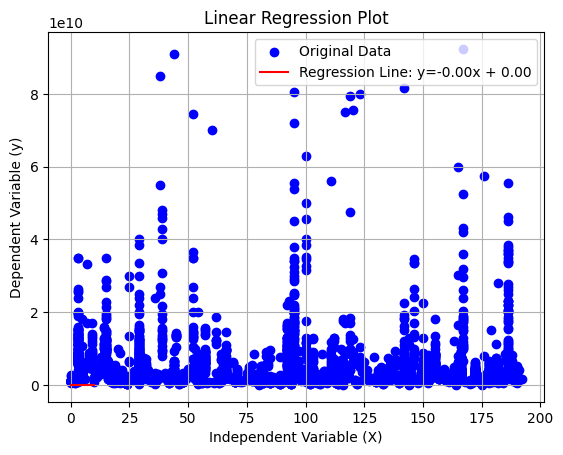

In [152]:
################### Machine Learning: Linear Regression ##################
##################### Step 8: Exploring our results: #####################

x = data['Address']
y = data['Price']

# Get the coefficient (slope) and intercept
slope = RegModel.coef_[0]
intercept = RegModel.intercept_

print(f"Model fitted with slope: {slope:.2f}")
print(f"Model fitted with intercept: {intercept:.2f}")

# 3. Plot the original data
plt.scatter(x, y, color='b', label='Original Data')

# 4. Plot the regression line
# The line equation is y = slope * x + intercept
# To plot the line, create a range of x-values and compute the corresponding y-values
x_line = np.linspace(0, 10, 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, color='r', label=f'Regression Line: y={slope:.2f}x + {intercept:.2f}')

# Add labels, title, and legend for clarity
plt.title('Linear Regression Plot')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
################### Machine Learning: Linear Regression ###################
##################### Step 9: Evaluating our results: #####################

mse = mean_squared_error(y_test, y_pre)
mse


6.836149338461009e-06

In [158]:
################### Machine Learning: Linear Regression ###################
##################### Step 9: Evaluating our results: #####################

r = r2_score(y_test, y_pre)
r

0.9999999999999999